## ============================================================================
## EARTHQUAKE DATA ANALYSIS
## ============================================================================
## Author: Yash Dhanawate
## Date: October 2025
## Dataset: Earthquake events (782 records)
## Objective: Analyze patterns, trends, and correlations in seismic and **Tsunami** activity
## ============================================================================

In [10]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Statistical analysis
from scipy import stats

# 1. Data Loading and Overview
---
## 1.1 Loading the Dataset
- **Dataset:** Earthquake & Tsunami Data  
- **Source:** Kaggle 

In [11]:
df = pd.read_csv("../data/raw/raw_earthquake_data_tsunami.csv")

## 1.2 Initial Inspection
- There are 782 rows and 13 columns.
- The dataset contains columns like `magnitude`, `depth`,  `latitude`, etc
- The first few rows show clean, structured entries without formatting errors
- All of the columns are numeric, with almost half  `float64` and remaining `int64`
- No missing values and DataType mismatch were found

In [12]:
# Check dimensions (Number of rows/columns)
print(f'\nDataset: {df.shape[0]:,} rows × {df.shape[1]} columns')

# List of all Columns
print(f'\nColumns: {", ".join(df.columns.tolist())}') 

# Display the first few rows and last rows
print("\nThe first few rows: ")
df.head()


Dataset: 782 rows × 13 columns

Columns: magnitude, cdi, mmi, sig, nst, dmin, gap, depth, latitude, longitude, Year, Month, tsunami

The first few rows: 


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


---
### 📊 Column Descriptions

| Column Name | Full Form | Description |
|:-------------|:-----------|:-------------|
| magnitude | – | Earthquake strength |
| cdi | Community Determined Intensity | Community-reported shaking intensity |
| mmi | Modified Mercalli Intensity | Instrument-measured shaking intensity |
| sig | Significance | Overall event significance score |
| nst | Number of Stations | Number of seismic stations reporting |
| dmin | Distance to Nearest Station | Closest distance to a seismic station |
| gap | Azimuthal Gap | Data coverage angle between reporting stations |
| depth | – | Depth of earthquake (km) |
| latitude | – | Epicenter’s north–south coordinate |
| longitude | – | Epicenter’s east–west coordinate |
| Year | – | Year of occurrence |
| Month | – | Month of occurrence |
| tsunami | – | 1 = tsunami occurred, 0 = none |
---

### 📊 Statistical Summary Interpretation

- **Magnitude (`magnitude`)**  
  - Range: 6.5 – 9.1 (**mostly strong earthquakes**)  
  - Mean: 6.94, Median: 6.8 → slight right skew  
  - Std: 0.45 → most quakes are near mean magnitude  

- **Community Intensity (`cdi`)**  
  - Range: 0 – 9, Mean: 4.33, Median: 5  
  - Many quakes had **low intensity reports**, a few high → right-skewed  

- **Instrument Intensity (`mmi`)**  
  - Range: 1 – 9, Mean: 5.96, Median: 6 → roughly symmetric  

- **Significance (`sig`)**  
  - Range: 650 – 2910, Mean: 870, Median: 754 → right-skewed, **few very significant events**  

- **Number of Stations (`nst`)**  
  - Range: 0 – 934, Mean: 230, Median: 140 → **many quakes reported by few stations**  

- **Distance to Nearest Station (`dmin`)**  
  - Range: 0 – 17.65 km, Median: 0 → **most quakes recorded very close to a station**  

- **Azimuthal Gap (`gap`)**  
  - Range: 0 – 239°, Median: 20 → **most quakes have good station coverage**  

- **Depth (`depth`)**  
  - Range: 2.7 – 670.81 km, Mean: 75.88, Median: 26.3 → strongly right-skewed, **mostly shallow quakes**,  
    a small number of very deep earthquakes are pulling the mean upward

- **Latitude & Longitude (`latitude`, `longitude`)**  
  - Global spread: latitude -61 to 71, longitude -179 to 179  

- **Year & Month (`Year`, `Month`)**  
  - Years: 2001 – 2022  
  - Month median ~7 → sligthly more quakes occur after mid-year  

- **Tsunami (`tsunami`)**  
  - Mean: 0.388 → **~39% of earthquakes triggered a tsunami** 

---

### ✅ Key Observations

- Most earthquakes are **moderate-to-strong** (6.5–7.1) and occur at **shallow depths** (<50 km)  
- A few earthquakes are **very deep or extremely strong**, skewing the mean values upward  
- Tsunamis occur in **~39% of cases**  
- Data coverage (`nst`, `gap`, `dmin`) shows **uneven seismic station distribution**  
- Both community-reported (`cdi`) and instrument-measured (`mmi`) intensity mostly **center around moderate levels**, with occasional extreme events


In [13]:
# View column types and non-null counts
print("\nColumn dtypes and non-null counts:")
df.info()


# Displays descriptive statistics (count, mean, std, min, max, quartiles) 
print("\nDisplays descriptive statistics: ")
df.describe(include='all').T.style.background_gradient(cmap='Reds')


Column dtypes and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB

Displays descriptive statistics: 


,count,mean,std,min,25%,50%,75%,max
magnitude,782.000000,6.941125,0.445514,6.500000,6.600000,6.800000,7.100000,9.100000
cdi,782.000000,4.333760,3.169939,0.000000,0.000000,5.000000,7.000000,9.000000
mmi,782.000000,5.964194,1.462724,1.000000,5.000000,6.000000,7.000000,9.000000
sig,782.000000,870.108696,322.465367,650.000000,691.000000,754.000000,909.750000,2910.000000
nst,782.000000,230.250639,250.188177,0.000000,0.000000,140.000000,445.000000,934.000000
dmin,782.000000,1.325757,2.218805,0.000000,0.000000,0.000000,1.863000,17.654000
gap,782.000000,25.038990,24.225067,0.000000,14.625000,20.000000,30.000000,239.000000
depth,782.000000,75.883199,137.277078,2.700000,14.000000,26.295000,49.750000,670.810000
latitude,782.000000,3.538100,27.303429,-61.848400,-14.595600,-2.572500,24.654500,71.631200
longitude,782.000000,52.609199,117.898886,-179.968000,-71.668050,109.426000,148.941000,179.662000


# 2. Data Cleaning
---
## 2.1 Missing and Duplicate Values
- There are no missing values in the dataset
- No Duplicate rows are seen 
---
## 2.2 Outlier Dectection
- The outlier here are not marjor and within expect range for each column
- Significance's (`sig`) outliers conforms there are significant earthquake events, with very dep shaking of earth's crust
- These events where so significant that they where reported by multiple station

In [14]:
# Get the number of missing values per column
print('\nThe missing values per column:\n')
print(df.isnull().sum())

# Check for duplicate rows
print(f'\nNumber of duplicate rows: {df.duplicated().sum()}')



The missing values per column:

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

Number of duplicate rows: 0


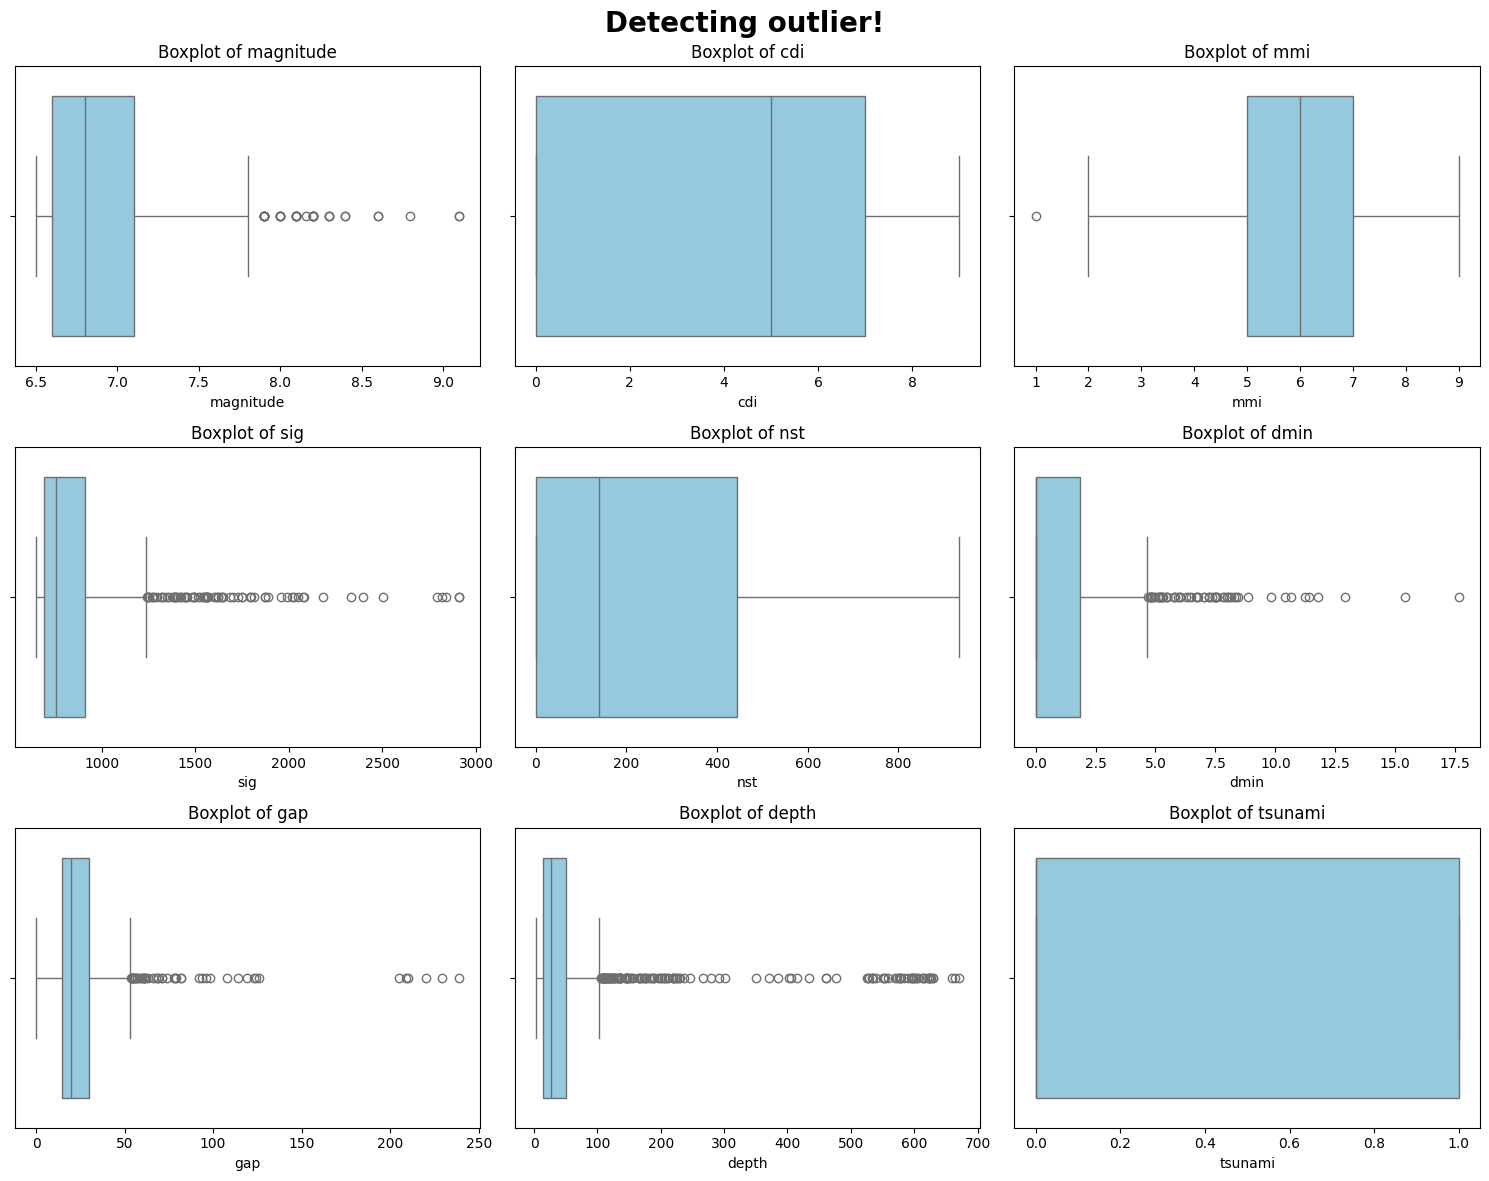

In [15]:
# Box plots for numeric columns (There are no categorical columns in the Dataset)
numeric_cols = df.select_dtypes(include=['number']).columns
## Excluded these column as they contain values that can be considered as outliers but are actually valid data points
exclude_cols = ['Month', 'Year', 'latitude', 'longitude']  
col_for_outliers = [col for col in numeric_cols if col not in exclude_cols]


fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # adjust size as needed
axs = axs.flatten()  # flatten 2D array to 1D for easy indexing

for i, col in enumerate(col_for_outliers):
    sns.boxplot(x=df[col], ax=axs[i], color='skyblue')
    axs[i].set_title(f'Boxplot of {col}')
    
fig.suptitle('Detecting outlier!', fontsize=20, fontweight='bold')
plt.tight_layout()
# fig.savefig('my_plots.png')
plt.show()

## 2.3 DataType conversion

In [16]:
# Converting to `int` DataType where applicable
df['cdi'] = df['magnitude'].astype('int32')
df['mmi'] = df['magnitude'].astype('int32')
df['sig'] = df['sig'].astype('int32')
df['nst'] = df['nst'].astype('int32')

# Converting to `float` DataType where applicable
df['magnitude'] = df['magnitude'].astype('float64').round(1)
df['dmin'] = df['dmin'].astype('float64').round(3)
df['gap'] = df['gap'].astype('float64').round(1)
df['depth'] = df['depth'].astype('float64').round(2)
df['latitude'] = df['latitude'].astype('float64').round(4)
df['longitude'] = df['longitude'].astype('float64').round(3)

# Converting Categorical DataType where applicable
# In this dataset, Year and Month can be treated as categorical variables
df['Year'] = df['Year'].astype('category')
df['Month'] = df['Month'].astype('category')
df['tsunami'] = df['tsunami'].astype('category')

# Changing names of some columns for better view

df.rename(columns={'magnitude': 'Magnitude',
                    'cdi': 'Community_Determined_Intensity',
                    'mmi': 'Modified_Mercalli_Intensity',
                    'sig': 'Significance',
                    'nst': 'Number_of_Stations',
                    'dmin': 'Distance_to_Nearest_Station',
                    'gap': 'Azimuthal_Gap',
                    'depth': 'Depth_(km)',
                    'tsunami': 'Tsunami',
                    }, inplace=True)
      
# Check the updated DataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Magnitude                       782 non-null    float64 
 1   Community_Determined_Intensity  782 non-null    int32   
 2   Modified_Mercalli_Intensity     782 non-null    int32   
 3   Significance                    782 non-null    int32   
 4   Number_of_Stations              782 non-null    int32   
 5   Distance_to_Nearest_Station     782 non-null    float64 
 6   Azimuthal_Gap                   782 non-null    float64 
 7   Depth_(km)                      782 non-null    float64 
 8   latitude                        782 non-null    float64 
 9   longitude                       782 non-null    float64 
 10  Year                            782 non-null    category
 11  Month                           782 non-null    category
 12  Tsunami               

# 3. EDA
---
## 3.1 📈 Univariate Analysis
### 3.1.1 🔢 Numerical Columns

- Earthquakes with a magnitude of **6.5–7.0** occurred most frequently. While these are strong earthquakes capable of destroying poorly built structures within `~100 km` of the epicenter, they generally resulted in a moderate level of community impact and low significance scores within this dataset

- The analysis shows that these earthquakes were often **very shallow**. Shallow depth can lead to more intense surface shaking, even if the magnitude is not the highest, as the energy is released closer to the surface

- The number of stations reporting these events varied significantly. As the bivariate analysis later shows, this is heavily dependent on location: strong earthquakes that occur offshore are recorded by fewer stations, while strong land-based events are recorded by many. The distance to the nearest station was often very low, suggesting many quakes in the dataset occurred near a sensor

### 3.1.2 📊 Categorical Columns

- The years **2015**, **2013**, and **2014** experienced the most earthquakes, while **2008** had the fewest

- **September**, **November**, and **April** were the months with the highest frequency of events, while June had the least

- The distribution for the tsunami classification is slightly imbalanced, which is an important consideration when splitting the data for training, testing, and validation


In [17]:
# As we have change the DataTypes, we will redefine numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

Magnitude → Skewness: 1.45


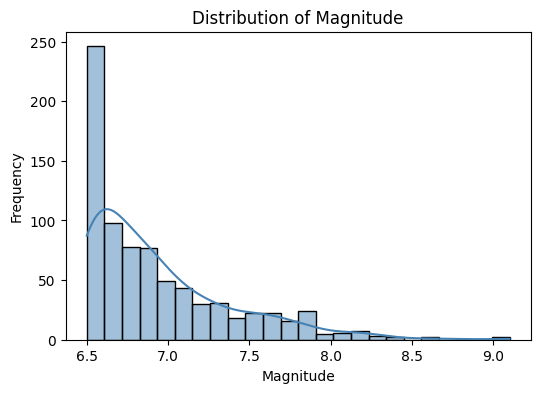

⚠️ Magnitude is highly skewed — consider transformation.

Community_Determined_Intensity → Skewness: 1.15


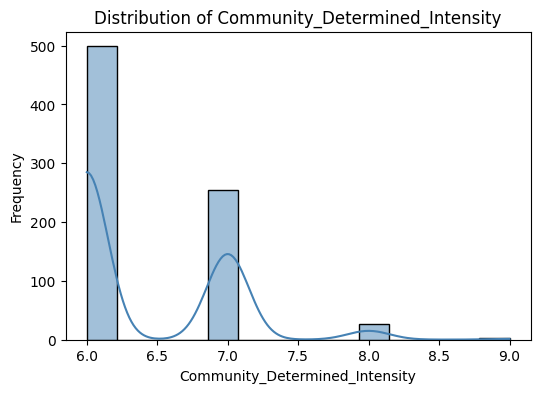

⚠️ Community_Determined_Intensity is highly skewed — consider transformation.

Modified_Mercalli_Intensity → Skewness: 1.15


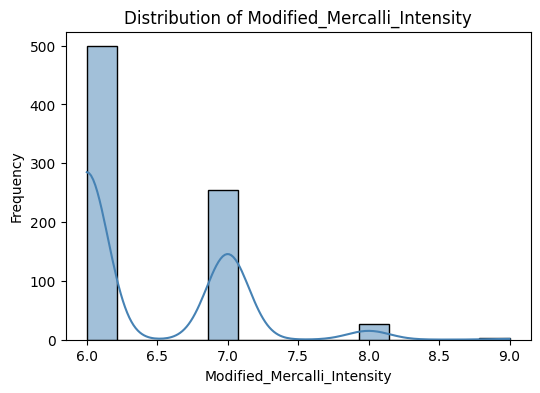

⚠️ Modified_Mercalli_Intensity is highly skewed — consider transformation.

Significance → Skewness: 3.08


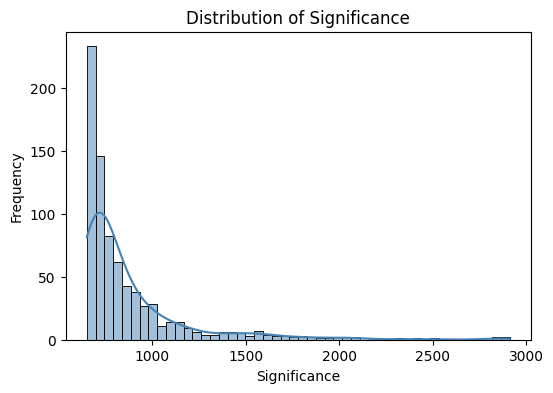

⚠️ Significance is highly skewed — consider transformation.

Number_of_Stations → Skewness: 0.53


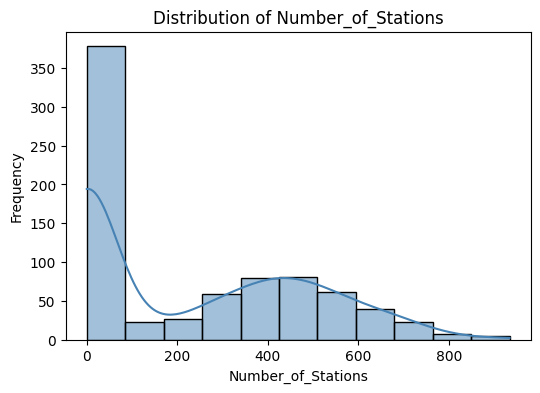

📊 Number_of_Stations is moderately/slightly skewed — no transformation.

Distance_to_Nearest_Station → Skewness: 2.60


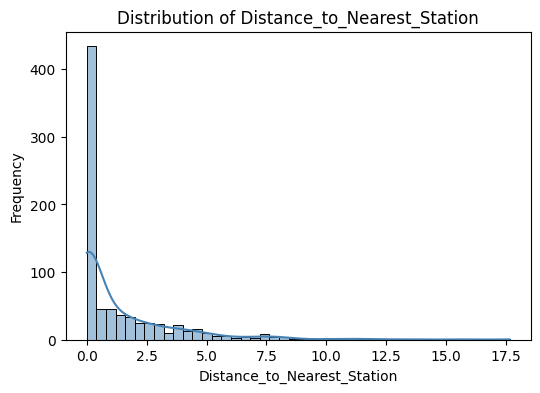

⚠️ Distance_to_Nearest_Station is highly skewed — consider transformation.

Azimuthal_Gap → Skewness: 4.67


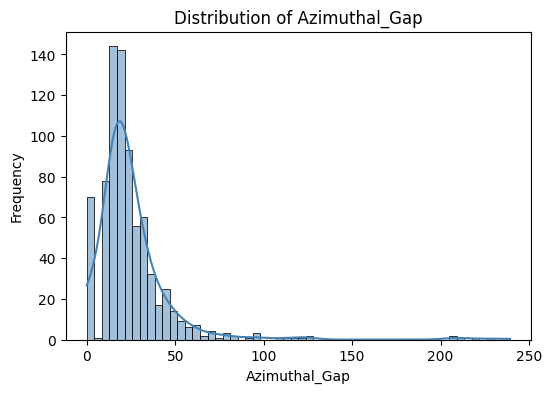

⚠️ Azimuthal_Gap is highly skewed — consider transformation.

Depth_(km) → Skewness: 3.02


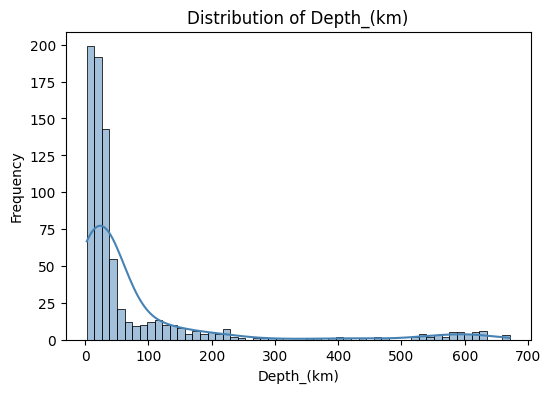

⚠️ Depth_(km) is highly skewed — consider transformation.

latitude → Skewness: 0.20


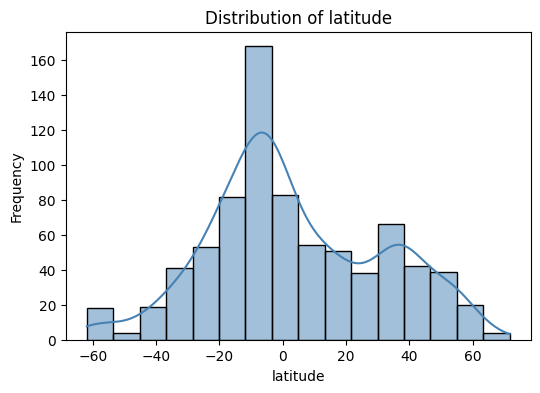

📊 latitude is moderately/slightly skewed — no transformation.

longitude → Skewness: -0.70


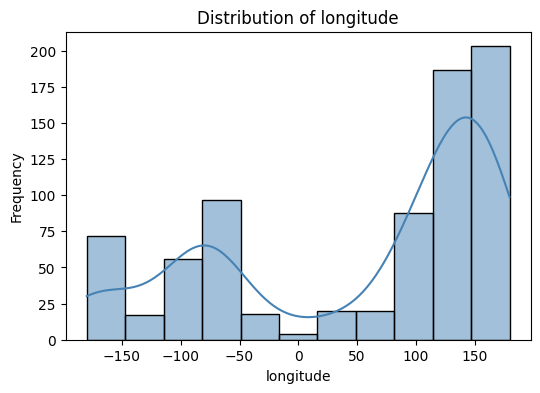

📊 longitude is moderately/slightly skewed — no transformation.



In [18]:
# Numerical Columns Univariate Analysis- Checking distribution and skewness

# Function to plot distribution of numeric columns
def plot_count_skewness(column):
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column], kde=True, color='steelblue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        # plt.savefig(fr'..\plots\Distribution of {column}.png' )
        plt.show()

# Plotting distribution and calculating skewness
for col in numeric_cols:
    skewness = df[col].skew()
    
    if abs(skewness) > 1:
        print(f"{col} → Skewness: {skewness:.2f}")
        plot_count_skewness(col)
        print(f"⚠️ {col} is highly skewed — consider transformation.\n")
    else:
        print(f"{col} → Skewness: {skewness:.2f}")
        plot_count_skewness(col)        
        print(f"📊 {col} is moderately/slightly skewed — no transformation.\n")

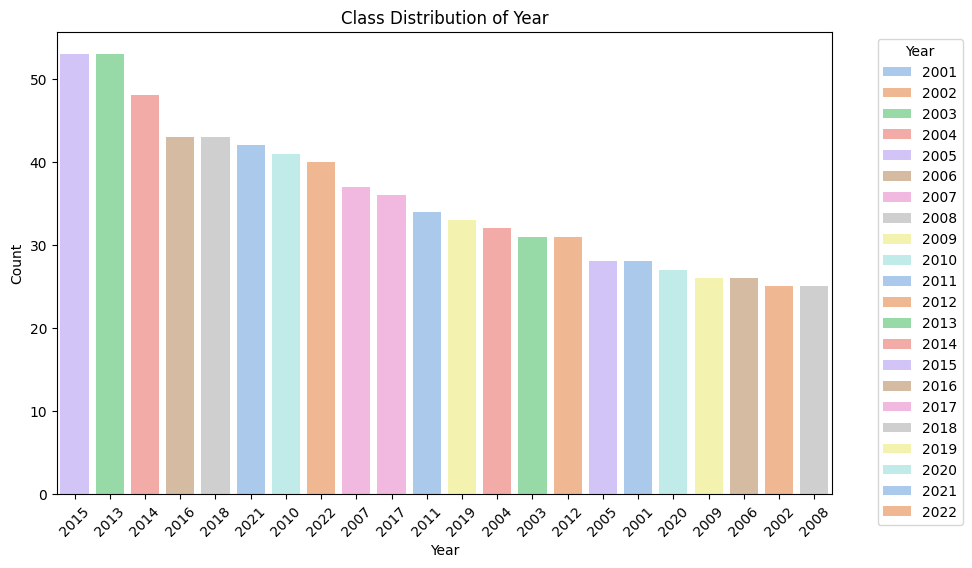


Year Class Distribution (%):
Year
2015    6.8
2013    6.8
2014    6.1
2016    5.5
2018    5.5
2021    5.4
2010    5.2
2022    5.1
2007    4.7
2017    4.6
2011    4.3
2019    4.2
2004    4.1
2003    4.0
2012    4.0
2005    3.6
2001    3.6
2020    3.5
2009    3.3
2006    3.3
2002    3.2
2008    3.2
Name: proportion, dtype: float64



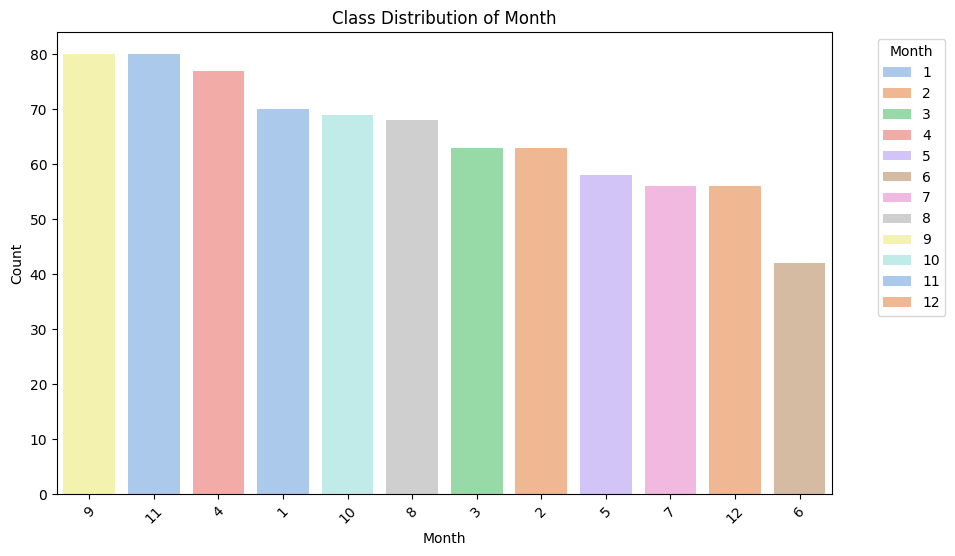


Month Class Distribution (%):
Month
9     10.2
11    10.2
4      9.8
1      9.0
10     8.8
8      8.7
3      8.1
2      8.1
5      7.4
7      7.2
12     7.2
6      5.4
Name: proportion, dtype: float64



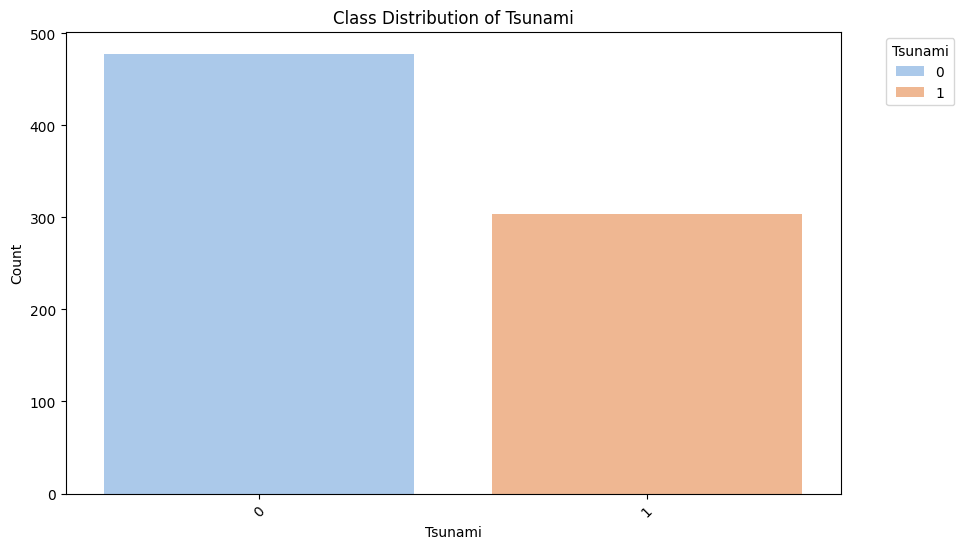


Tsunami Class Distribution (%):
Tsunami
0    61.1
1    38.9
Name: proportion, dtype: float64



In [19]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    
    order = df[col].value_counts().index
    
    sns.countplot(x=df[col], order=order, palette='pastel', hue=df[col])
    plt.title(f'Class Distribution of {col}')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    if len(df[col]) > 10:
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)
    plt.ylabel('Count')
    # plt.savefig(fr'..\plots\{col}_class_distribution.png' )
    plt.show()
    
    counts = df[col].value_counts(normalize=True) * 100
    print(f"\n{col} Class Distribution (%):\n{counts.round(1)}\n")

    
    if counts.max() > 80:
        print(f"⚠️ {col} is highly imbalanced.\n")


## 3.2 Bivariate Analysis
---
### 3.2.1 Numerical vs Numerical Bivariate
- The dataset clearly links earthquake strength to recording quality.
- Stronger earthquakes (high Magnitude) are rated as more Significant. These major events are detected by a high Number of Stations, which in turn provides better 360-degree coverage (a low Azimuthal Gap).
- This means we have the most accurate location data for the most powerful earthquakes. Geographically, these quakes aren't random—they happen in specific zones that map the Earth's tectonic plate boundaries.

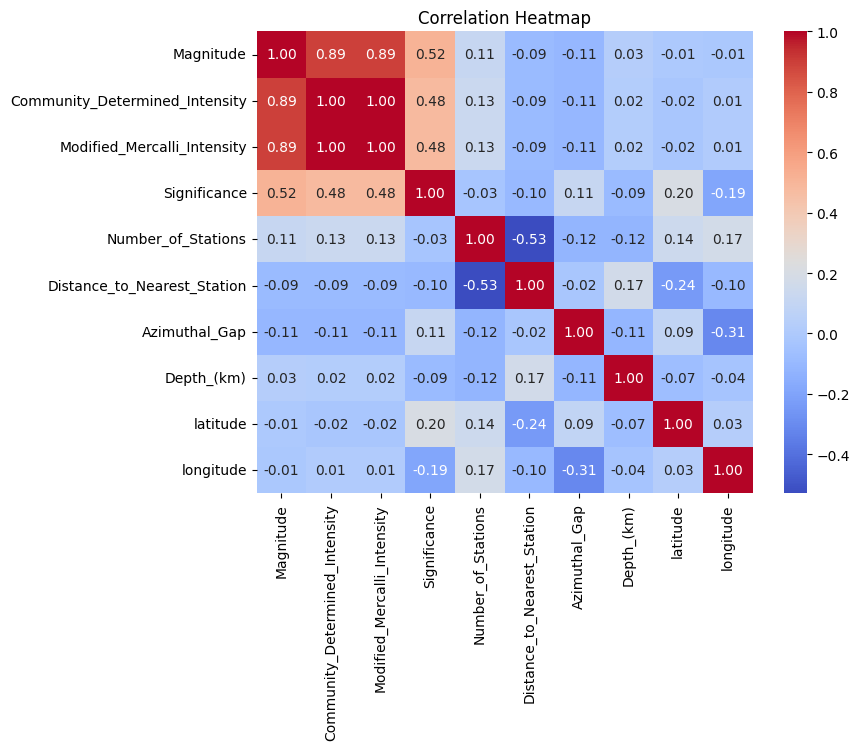

In [20]:
# Correlation Heatmap between numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
# plt.savefig(r'..\plots\bivariate_analysis\numerical_vs_numerical\correlation_heatmap_numeric_features.png')
plt.show()

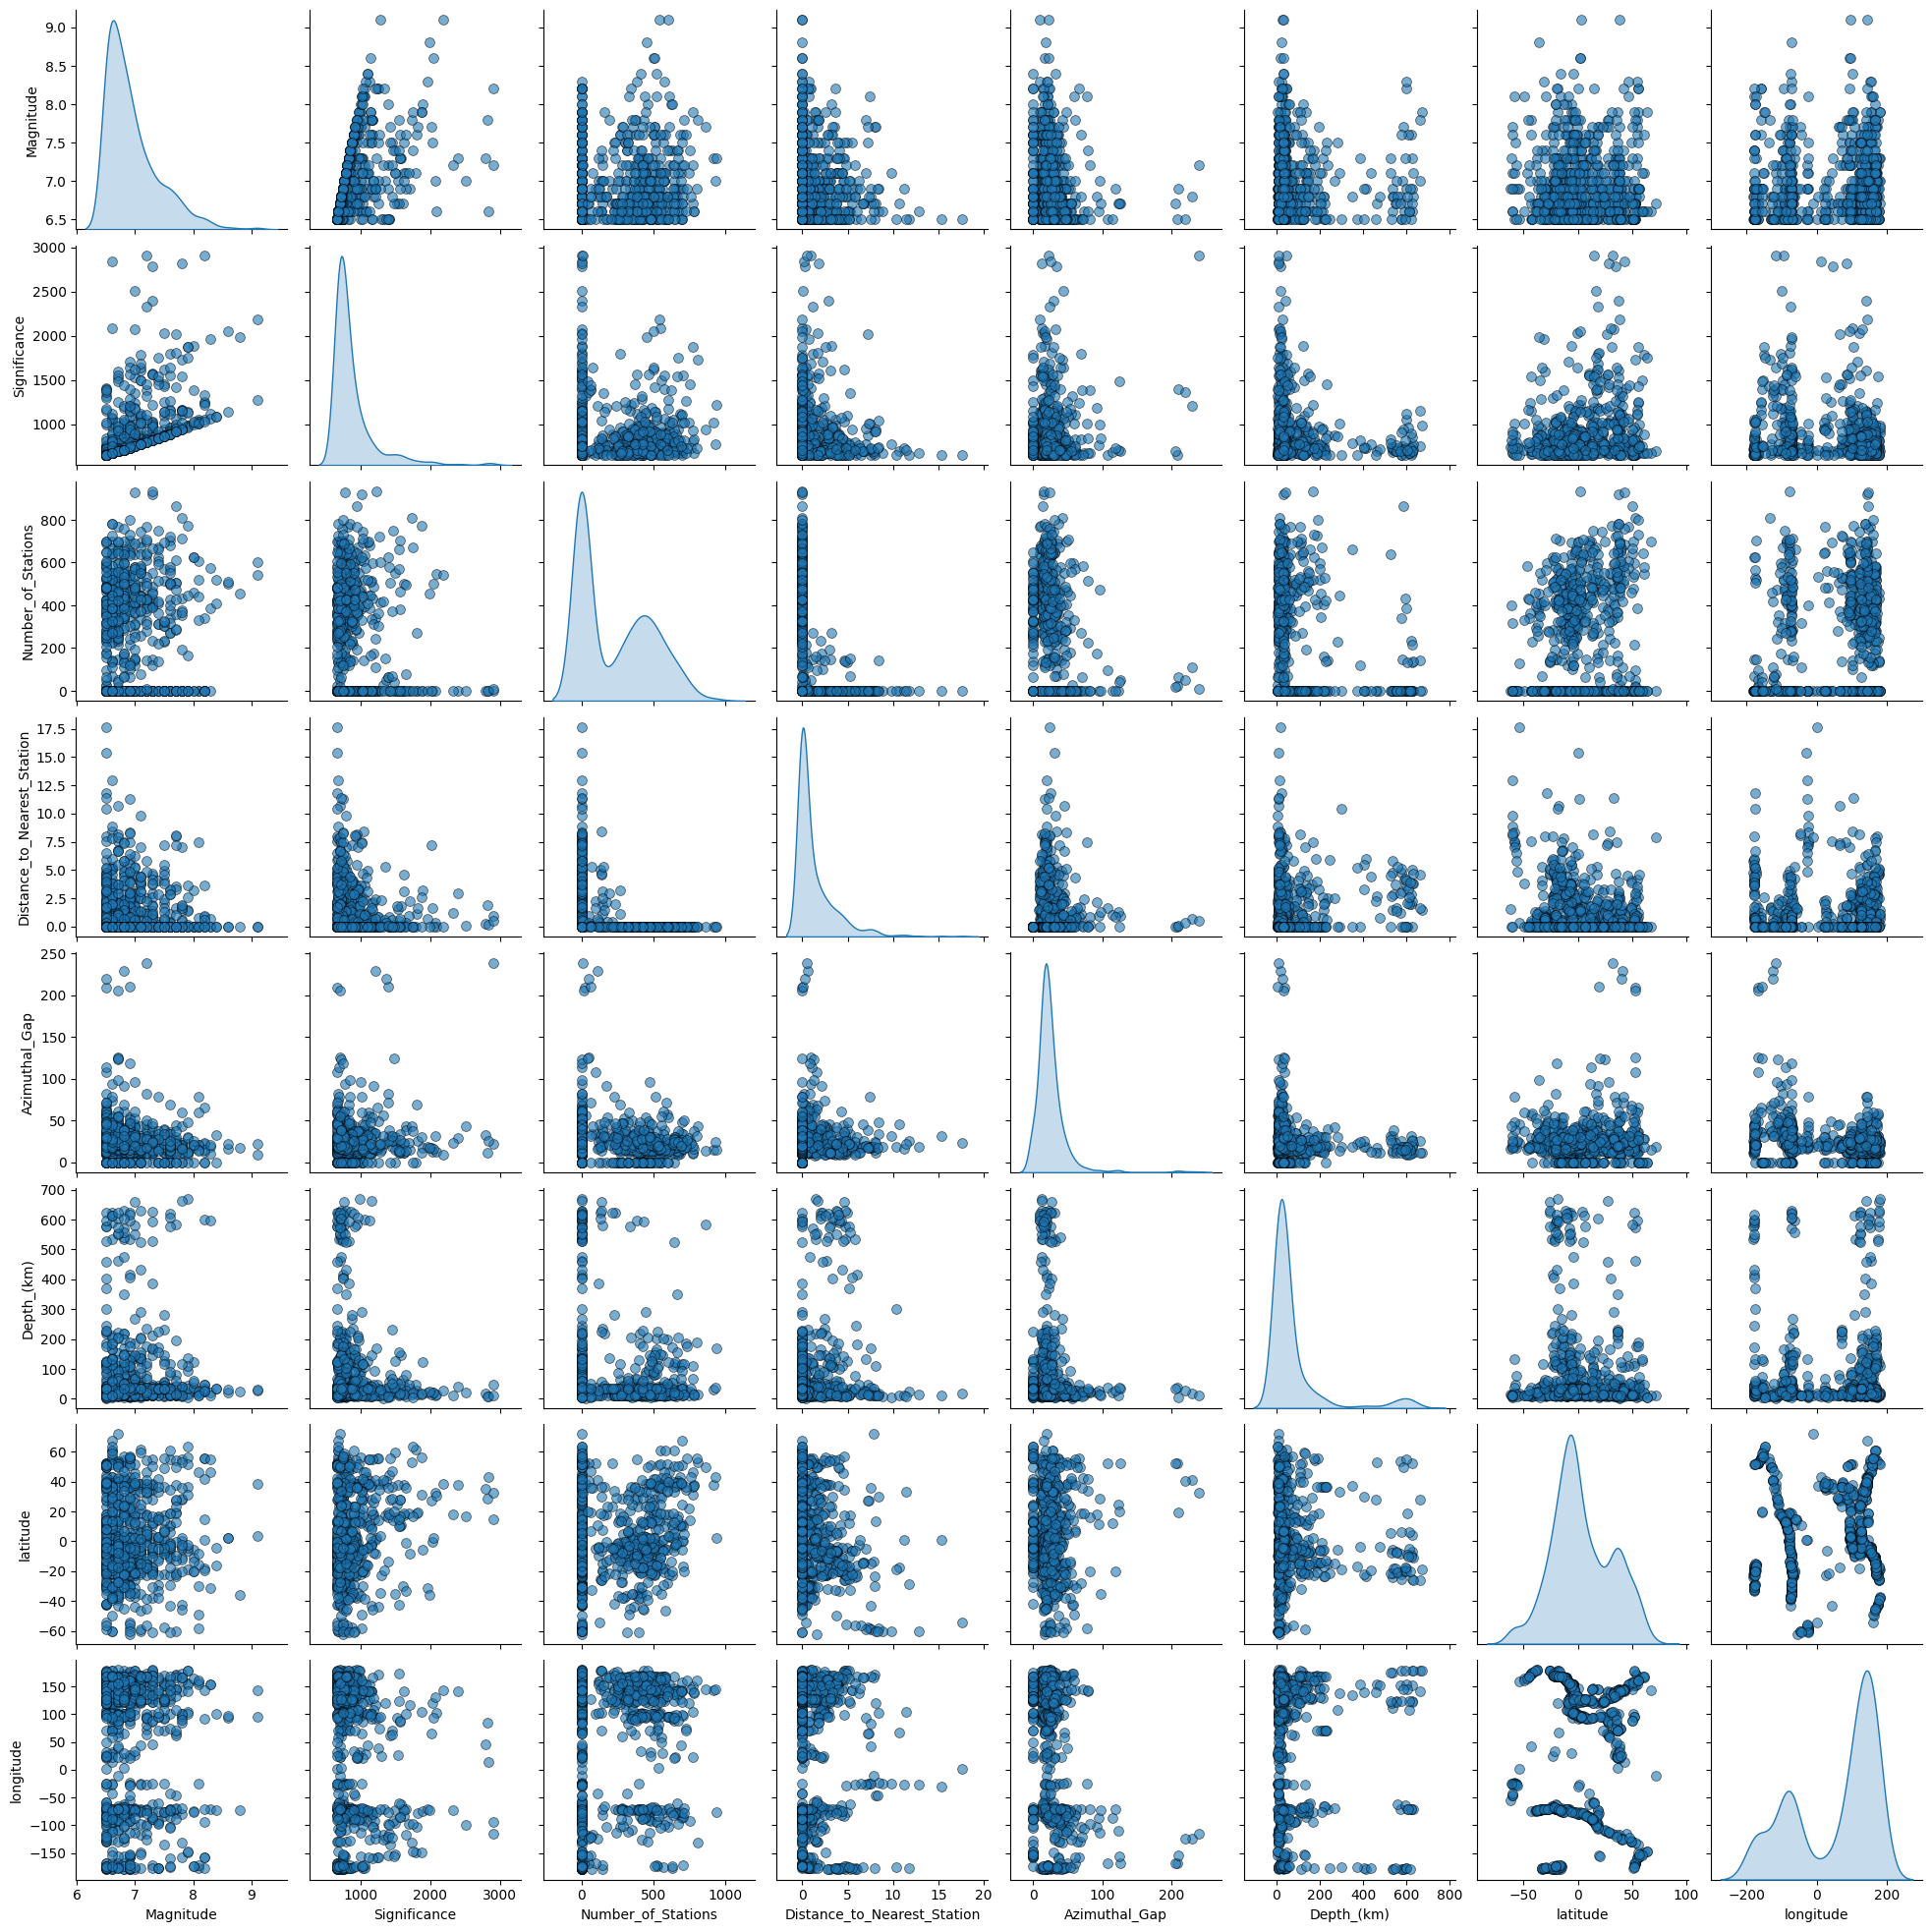

In [21]:
# Pairplot for distribution of numeric features
sns.pairplot(df[['Magnitude', 'Significance', 'Number_of_Stations',
       'Distance_to_Nearest_Station', 'Azimuthal_Gap', 'Depth_(km)',
       'latitude', 'longitude', 'Year', 'Month', 'Tsunami']], 
            diag_kind='kde', 
            plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'}, 
            diag_kws={'fill': True})
# plt.savefig(r'..\plots\bivariate_analysis\numerical_vs_numerical\pairplot_numeric_features.png')
plt.show()

### 3.2.2 Numerical vs Categorical Bivariate Analysis

- **Magnitude & Significance:** Tsunami-generating earthquakes tend to have similar magnitudes to non-tsunami events but show lower median significance scores, likely because they occur offshore where fewer people and stations are affected.

- **Station Network:** Tsunami events are typically recorded by fewer stations, and the nearest station is generally farther away, suggesting that these events often occur in remote or oceanic regions.

- **Depth:** Both tsunami and non-tsunami earthquakes are mostly shallow, but the deepest events are less common among tsunami cases.

- **Location:** Tsunami events cluster in specific oceanic regions near subduction zones (often close to the equator), while non-tsunami earthquakes are distributed more broadly across latitudes and longitudes.

**Summary:**  
Earthquakes that trigger tsunamis are generally *moderate-to-strong*, *shallow*, and *offshore*, leading to lower recorded significance and fewer nearby detection stations. Their geographic clustering near the equator aligns with known subduction zones where tsunamis commonly originate.


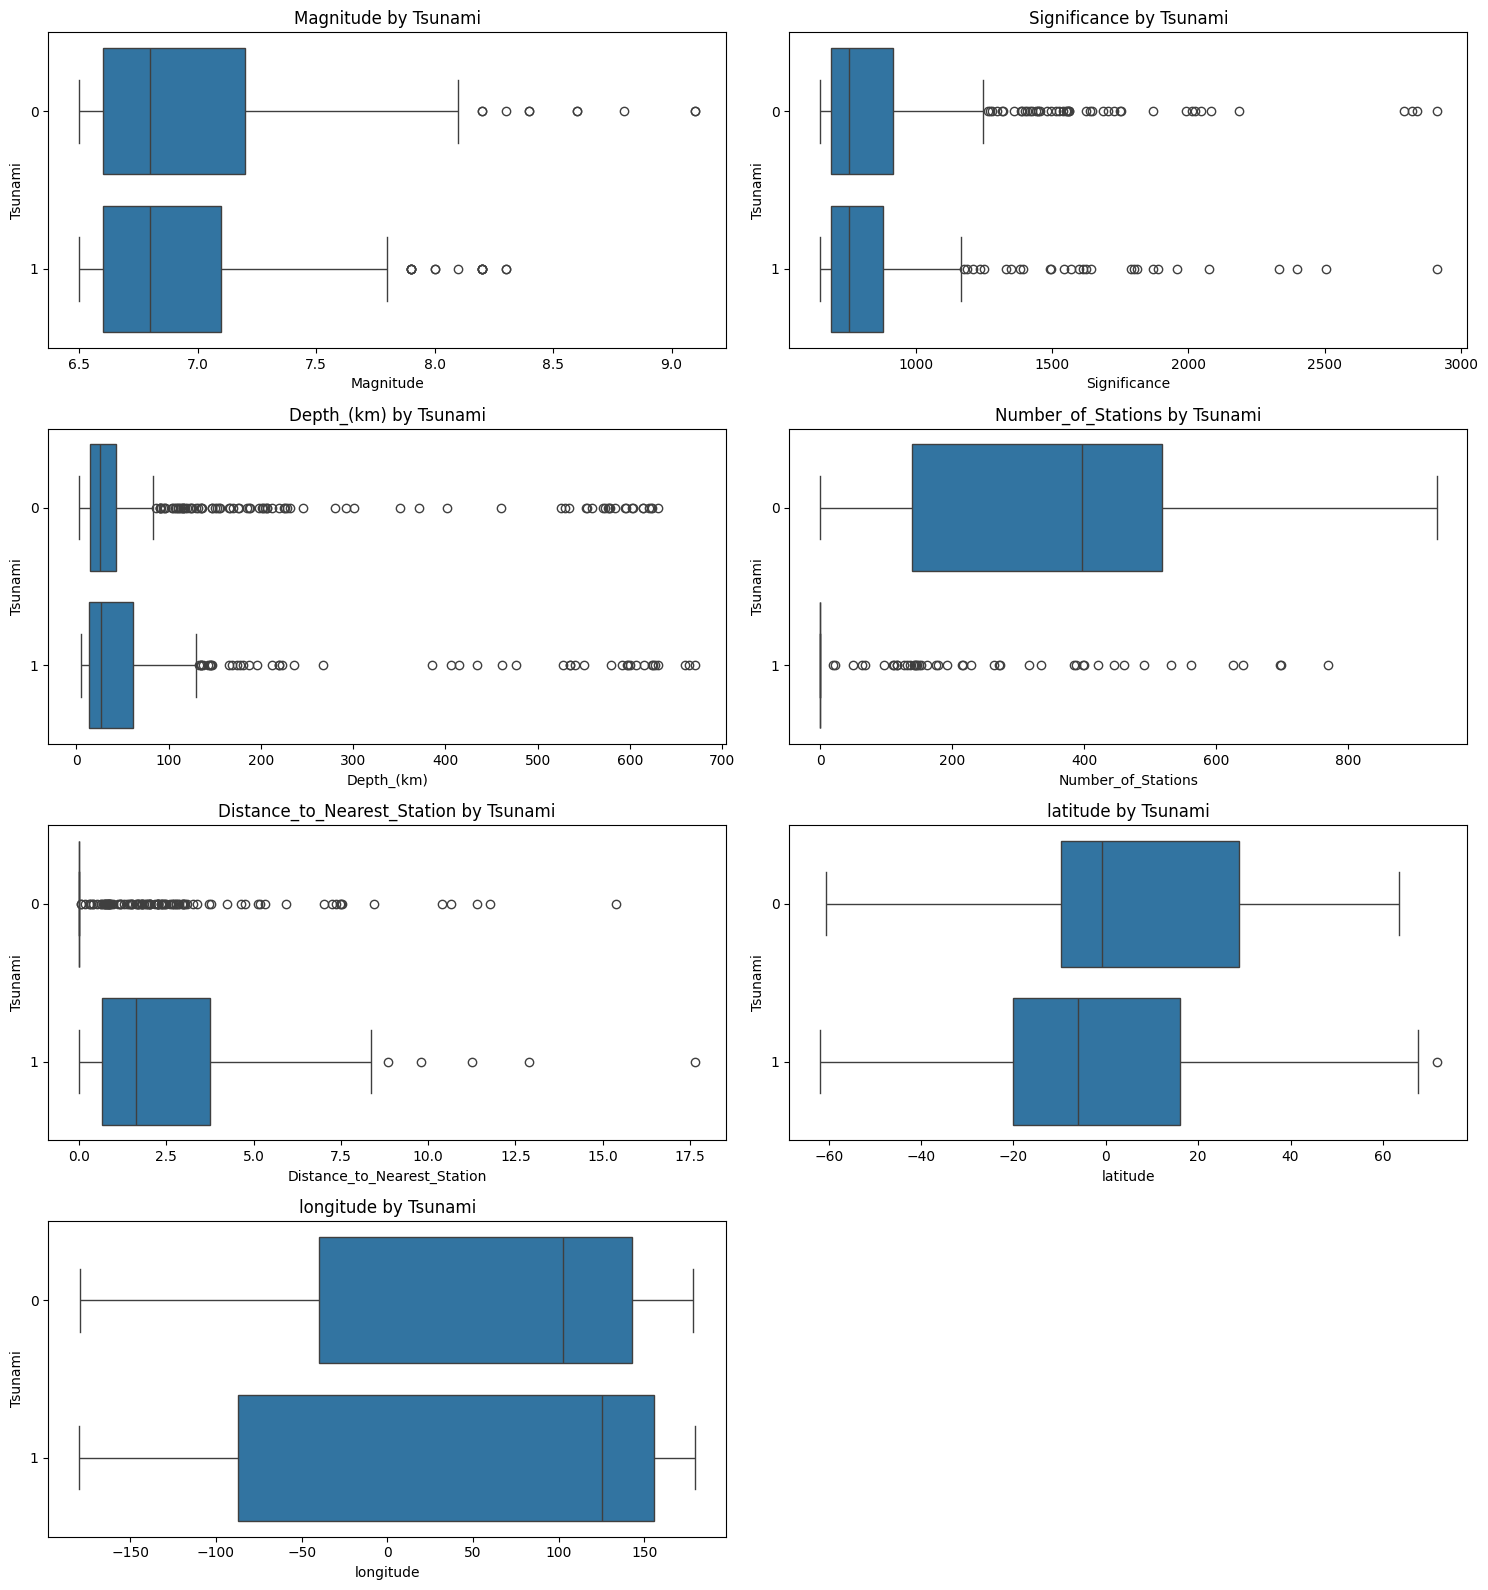

In [22]:
num_cols = ['Magnitude', 'Significance', 'Depth_(km)', 
            'Number_of_Stations', 'Distance_to_Nearest_Station', 
            'latitude', 'longitude']

cols = 2
rows = (len(num_cols) + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(y='Tsunami', x=col, data=df, ax=ax, orient='h')  # swapped x and y
    ax.set_title(f'{col} by Tsunami')

# Remove empty subplots if any
for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


### 3.2.3 Categorical vs Categorical Bivariate              
- There is clear proof from the plot that tsunami has occured after 2012 only with most tsunami occured where in november month

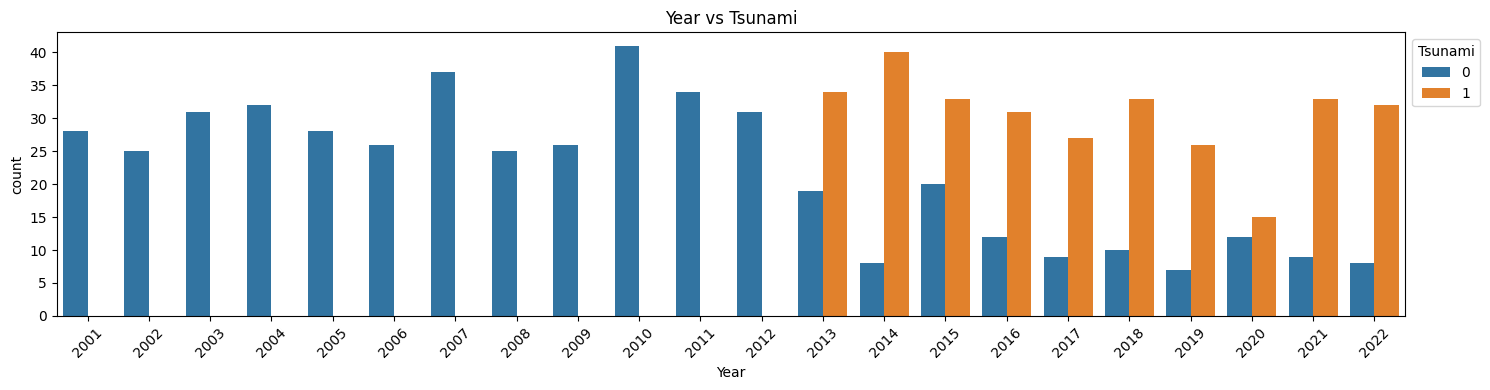

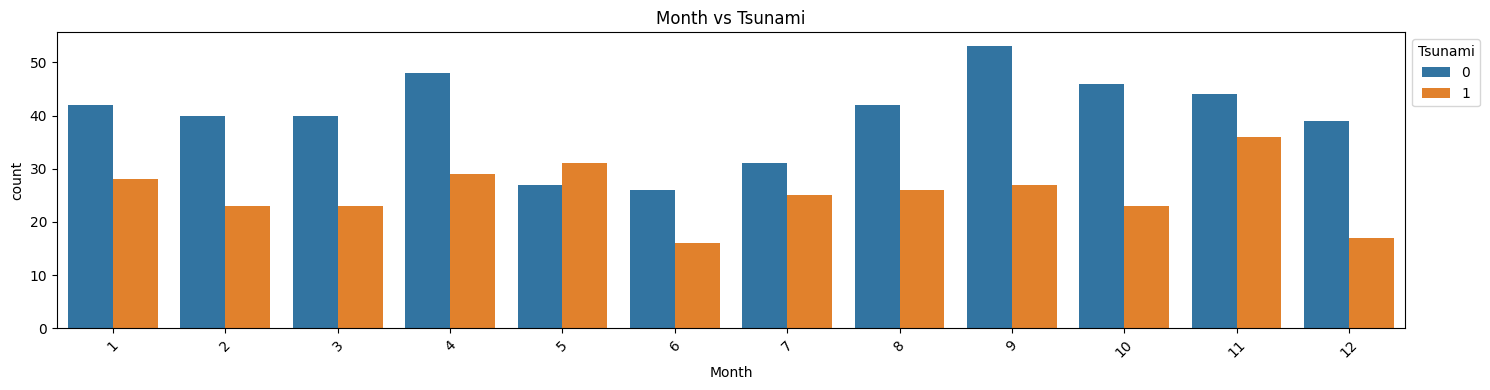

In [23]:
# Categorical vs Categorical Bivariate analysis
def categorical_vs_categorical_bivariate_analysis(col1, col2, df):
    plt.figure(figsize=(15,4))
    sns.countplot(x=col1, hue=col2, data=df)
    plt.legend(title=col2, loc='upper left', bbox_to_anchor=(1,1))
    plt.title(f'{col1} vs {col2}')
    if len(df[col1].unique()) > 5:
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)
    # plt.savefig(fr'..\plots\bivariate_analysis\categorical_vs_categorical\{col1}_vs_{col2}_countplot.png' )
    plt.tight_layout()
    plt.show()

# 1.
categorical_vs_categorical_bivariate_analysis('Year', 'Tsunami', df)

# 2.
categorical_vs_categorical_bivariate_analysis('Month', 'Tsunami', df)
    


In [24]:
# Center map roughly at the Pacific
m = folium.Map(location=[0, 150], zoom_start=2, tiles="CartoDB positron")

p = folium.Map(location=[0, 150], zoom_start=2, tiles="CartoDB positron")

# Add tsunami points
for _, row in df.loc[df['Tsunami']==1].iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

for _, row in df.loc[df['Tsunami']==0].iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(p
)

m  # displays interactive map in Jupyter Notebook

In [25]:
# Saving Dataframe after changing DataTypes and column names
df.to_csv("../data/processed/earthquake_data_tsunami.csv", index=False)

# 4. Conclusions
---

## 4.1 Summary of Findings

* **Dataset Profile:** The dataset contains 782 entries from 2001–2022, focusing on strong earthquakes (magnitude 6.5+). The data is clean, with no missing values or datatype issues.
* **Typical Earthquake:** Most frequent events are moderate-to-strong (6.5–7.0 magnitude) and occur at very shallow depths. This shallow depth can increase surface shaking, even if magnitude isn’t extreme.
* **Tsunami Events:** About 39% of earthquakes in this dataset triggered a tsunami.
* **Tsunami Profile:** Tsunami-generating earthquakes are also moderate-to-strong and shallow, but are mostly offshore:
    * They cluster near remote oceanic regions and known subduction zones.
    * Being offshore, they are usually recorded by fewer stations and have lower community-reported significance scores.
* **Tsunami Location**: Earthquakes that trigger tsunamis are distinct primarily by their location. They cluster in specific oceanic regions near subduction zones (often near          the equator) , while non-tsunami events are more broadly distributed
* **Characteristics**: Tsunami-generating quakes have magnitudes similar to non-tsunami events and are also mostly shallow, though the very deepest earthquakes are less common in tsunami cases.
* **Event Timing**: The data suggests most tsunamis in this set occurred after 2012, with November being a particularly frequent month.
* **Data Quality vs. Location**: The relationship between magnitude and station coverage is nuanced. Generally, stronger earthquakes (high magnitude) correlate with high   significance scores and are detected by many stations. However, tsunami-generating earthquakes are the key exception: because they occur offshore, they are recorded by fewer stations and report lower community significance scores, despite their high magnitude.

---

## 4.2 Limitations

* **Class Imbalance:** The target variable `tsunami` is imbalanced (39% positive, 61% negative). This should be addressed in modeling (e.g., stratified sampling, resampling) to avoid bias.
* **Uneven Data Coverage:** Remote oceanic regions are under-recorded compared to land-based events, affecting variables like `nst`, `dmin`, and `gap`.
* **Data Scope:** Findings are limited to strong earthquakes (magnitude ≥6.5) between 2001–2022, so conclusions may not generalize to smaller events.

---

## 4.3 Future Work

* **Predictive Modeling:** Build classification models (e.g., Logistic Regression, Random Forest, Gradient Boosting) to predict `tsunami` occurrence.
* **Feature Engineering:** Create new features reflecting geographic patterns, e.g., distance to nearest tectonic plate boundary or subduction zone.
* **Handle Imbalance:** Use SMOTE or class weights to account for the imbalanced data.
* **Investigate Outliers:** Examine very deep or highly significant earthquakes, as they may disproportionately influence models; consider log transformation or robust scaling if necessary.


# 5. References

* **Data Source:**  
[Global Earthquake & Tsunami Risk Assessment Dataset](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset) – Kaggle

* **Libraries Used:**

  **Data Manipulation:**  
  - `numpy` → numerical computations, arrays  
  - `pandas` → dataframes, data cleaning, manipulation

  **Data Visualization:**  
  - `seaborn` → statistical plots, distributions, heatmaps  
  - `matplotlib.pyplot` → general plotting, figure customization  
  - `folium` → interactive maps for geospatial plotting  
  - `itertools.combinations` → generating column combinations for analysis

  **Statistical Analysis:**  
  - `scipy.stats` → skewness, correlation, hypothesis testing
